# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [28]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [45]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [47]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [49]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [51]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [54]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [57]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [60]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[2 0 0 0 0]

Y_oh_train[:5]=
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [62]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [65]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 25        
                                                                 
 layer2 (Dense)              (None, 10)                60        
                                                                 
 layer3 (Dense)              (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2. The Functional API

In [68]:
from tensorflow.keras.models import Model
# This returns a tensor
input_tensor = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation='softmax')(x2)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=out_tensor)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing 

In [71]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        out_tensor = self.dense3(x2)
        return out_tensor
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

Model: "my_neural_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  25        
                                                                 
 dense_10 (Dense)            multiple                  60        
                                                                 
 dense_11 (Dense)            multiple                  33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [74]:
model.compile(optimizer='SGD',loss='BinaryCrossentropy', metrics=['accuracy']) # compiling the model

In [76]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
2/2 [==============================] - 0s 56ms/step - loss: 0.7057 - accuracy: 0.2933 - val_loss: 0.7130 - val_accuracy: 0.2432
Epoch 2/300
2/2 [==============================] - 0s 13ms/step - loss: 0.7049 - accuracy: 0.2933 - val_loss: 0.7123 - val_accuracy: 0.2162
Epoch 3/300
2/2 [==============================] - 0s 12ms/step - loss: 0.7041 - accuracy: 0.2533 - val_loss: 0.7114 - val_accuracy: 0.1351
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 0.7032 - accuracy: 0.1867 - val_loss: 0.7107 - val_accuracy: 0.0811
Epoch 5/300
2/2 [==============================] - 0s 12ms/step - loss: 0.7025 - accuracy: 0.1733 - val_loss: 0.7100 - val_accuracy: 0.0541
Epoch 6/300
2/2 [==============================] - 0s 12ms/step - loss: 0.7017 - accuracy: 0.1200 - val_loss: 0.7092 - val_accuracy: 0.0270
Epoch 7/300
2/2 [==============================] - 0s 11ms/step - loss: 0.7010 - accuracy: 0.1067 - val_loss: 0.7084 - val_accuracy: 0.0270
Epoch 8/300
2/2 [===

Epoch 175/300
2/2 [==============================] - 0s 25ms/step - loss: 0.4298 - accuracy: 0.8267 - val_loss: 0.4229 - val_accuracy: 0.8919
Epoch 176/300
2/2 [==============================] - 0s 27ms/step - loss: 0.4286 - accuracy: 0.8400 - val_loss: 0.4216 - val_accuracy: 0.8919
Epoch 177/300
2/2 [==============================] - 0s 31ms/step - loss: 0.4272 - accuracy: 0.8400 - val_loss: 0.4200 - val_accuracy: 0.8919
Epoch 178/300
2/2 [==============================] - 0s 26ms/step - loss: 0.4259 - accuracy: 0.8400 - val_loss: 0.4185 - val_accuracy: 0.8919
Epoch 179/300
2/2 [==============================] - 0s 28ms/step - loss: 0.4246 - accuracy: 0.8400 - val_loss: 0.4171 - val_accuracy: 0.8919
Epoch 180/300
2/2 [==============================] - 0s 25ms/step - loss: 0.4234 - accuracy: 0.8400 - val_loss: 0.4157 - val_accuracy: 0.8919
Epoch 181/300
2/2 [==============================] - 0s 28ms/step - loss: 0.4221 - accuracy: 0.8400 - val_loss: 0.4145 - val_accuracy: 0.8919
Epoch 

Epoch 233/300
2/2 [==============================] - 0s 28ms/step - loss: 0.3636 - accuracy: 0.8933 - val_loss: 0.3405 - val_accuracy: 0.9459
Epoch 234/300
2/2 [==============================] - 0s 30ms/step - loss: 0.3626 - accuracy: 0.8933 - val_loss: 0.3392 - val_accuracy: 0.9459
Epoch 235/300
2/2 [==============================] - 0s 30ms/step - loss: 0.3616 - accuracy: 0.8933 - val_loss: 0.3380 - val_accuracy: 0.9459
Epoch 236/300
2/2 [==============================] - 0s 30ms/step - loss: 0.3606 - accuracy: 0.8933 - val_loss: 0.3366 - val_accuracy: 0.9459
Epoch 237/300
2/2 [==============================] - 0s 26ms/step - loss: 0.3596 - accuracy: 0.8933 - val_loss: 0.3353 - val_accuracy: 0.9459
Epoch 238/300
2/2 [==============================] - 0s 28ms/step - loss: 0.3586 - accuracy: 0.8933 - val_loss: 0.3338 - val_accuracy: 0.9459
Epoch 239/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3576 - accuracy: 0.8933 - val_loss: 0.3325 - val_accuracy: 0.9459
Epoch 

Epoch 291/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3035 - accuracy: 0.9067 - val_loss: 0.2662 - val_accuracy: 0.9459
Epoch 292/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3026 - accuracy: 0.9200 - val_loss: 0.2650 - val_accuracy: 0.9459
Epoch 293/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3018 - accuracy: 0.9200 - val_loss: 0.2638 - val_accuracy: 0.9459
Epoch 294/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3011 - accuracy: 0.9200 - val_loss: 0.2626 - val_accuracy: 0.9459
Epoch 295/300
2/2 [==============================] - 0s 27ms/step - loss: 0.3002 - accuracy: 0.9200 - val_loss: 0.2614 - val_accuracy: 0.9459
Epoch 296/300
2/2 [==============================] - 0s 29ms/step - loss: 0.2991 - accuracy: 0.9200 - val_loss: 0.2602 - val_accuracy: 0.9459
Epoch 297/300
2/2 [==============================] - 0s 29ms/step - loss: 0.2981 - accuracy: 0.9200 - val_loss: 0.2589 - val_accuracy: 0.9459
Epoch 

Test loss (cross-entropy and accuracy): [0.641017735004425, 0.2631579041481018]

Layer 0
Bias:
 [-0.00523517  0.0389457   0.05029336 -0.05716089  0.05065839]
W:
 [[ 0.23051071  0.10468644  0.26072535  0.24496078  0.36434186]
 [ 0.47226784  0.45149127  0.2541125  -0.27222028  0.53387046]
 [ 0.04601924  0.79834926 -0.31226042  0.21096532  0.49549213]
 [ 0.77288955  0.40701905 -0.70722836  0.2552925  -0.641391  ]]

Layer 1
Bias:
 [ 0.          0.00917892  0.          0.         -0.03837082 -0.09562968
  0.0406233   0.1041689   0.          0.        ]
W:
 [[-0.50160944  0.02827299 -0.20960507  0.2878539   0.17031458  0.01613089
  -0.16179575  0.23644337 -0.08664012  0.21818918]
 [-0.41731802  0.1544211  -0.5356545  -0.5843592  -0.15875733  0.01292521
   0.07492363  0.46528092 -0.18048164 -0.52600473]
 [ 0.5023678   0.37506098 -0.02500385  0.46553236 -0.06003705 -0.4797702
  -0.37639275 -0.47013435  0.16865903 -0.09825766]
 [ 0.28299278 -0.41049457 -0.48790783 -0.4995014   0.6357914   0.495

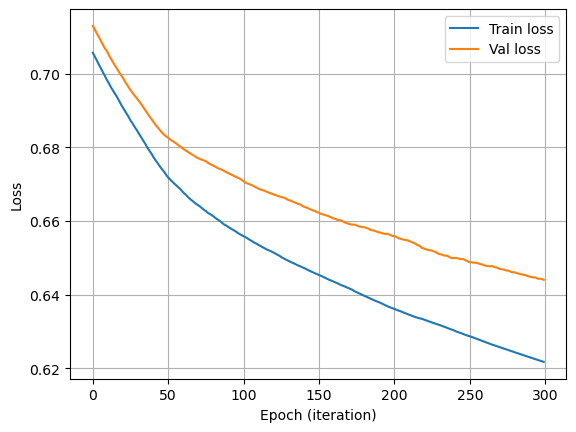

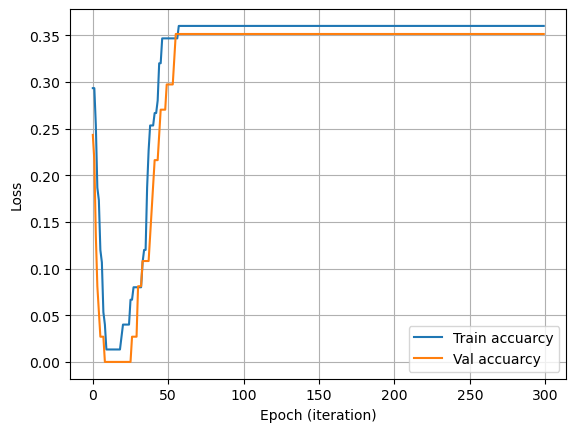

In [77]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3